In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import trimap

def tsne(X, initial_dims=50, max_iter=2000, perplexity=30.0):
    pca = PCA(n_components=initial_dims)
    X_reduced = pca.fit_transform(X)
    tsne = TSNE(n_components=2, verbose=True, perplexity=perplexity, n_iter=max_iter)
    Y = tsne.fit_transform(X_reduced)
    return Y

In [2]:
X = np.loadtxt('data/mnist2500_X.txt')
labels = np.loadtxt('data/mnist2500_labels.txt')

In [4]:
Y_tsne = tsne(X, 50, 2000, 20.0)
Y_trimap = trimap.embed(X, 50, 2000)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.003s...
[t-SNE] Computed neighbors for 2500 samples in 0.623s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 2.335065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.406349
[t-SNE] Error after 2000 iterations: 1.134591
Generated triplets 500 / 2500
Generated triplets 1000 / 2500
Generated triplets 1500 / 2500
Generated triplets 2000 / 2500
Generated triplets 2500 / 2500
Generated random triplets 500 / 2500
Generated random triplets 1000 / 2500
Generated random triplets 1500 / 2500
Generated random triplets 2000 / 2500
Generated random triplets 2500 / 2500
Iteration:  100, Loss: 43.128, Violated triplets: 0.1292
Iteration:  200, Loss: 23.837, Violated triplets: 0.0711
Iteration:  300, Loss: 18.243, Violated triplets: 0

In [5]:
from sklearn.neighbors import NearestNeighbors as knn

_, nbrs_input = knn(n_neighbors=50).fit(X).kneighbors(X)
_, nbrs_tsne = knn(n_neighbors=100).fit(Y_tsne).kneighbors(Y_tsne)
_, nbrs_trimap = knn(n_neighbors=100).fit(Y_trimap).kneighbors(Y_trimap)

In [8]:
from metrics import roc_metrics

tp_tsne, fp_tsne = roc_metrics(nbrs_input, nbrs_tsne)
tp_trimap, fp_trimap = roc_metrics(nbrs_input, nbrs_trimap)

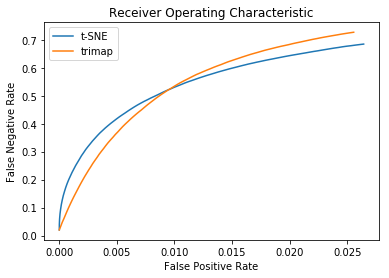

In [24]:
plt.plot(fp_tsne, tp_tsne, label='t-SNE')
plt.plot(fp_trimap, tp_trimap, label='trimap')
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [19]:
from metrics import mean_precision_recall

recall_tsne, precision_tsne = mean_precision_recall(nbrs_input, nbrs_tsne)
recall_trimap, precision_trimap = mean_precision_recall(nbrs_input, nbrs_trimap)

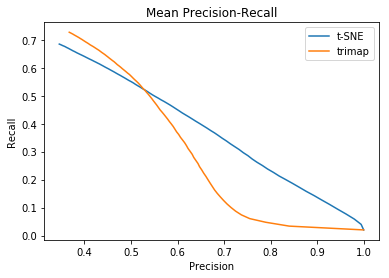

In [23]:
plt.plot(precision_tsne, recall_tsne, label='t-SNE')
plt.plot(precision_trimap, recall_trimap, label='trimap')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Mean Precision-Recall')
plt.legend()
plt.show()

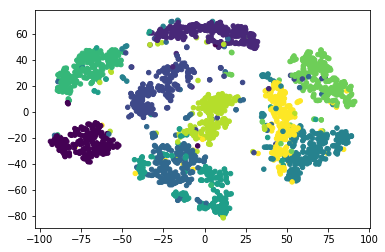

In [10]:
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], 20, labels)
plt.show()

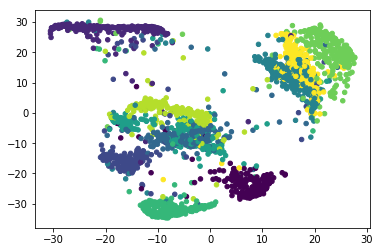

In [11]:
plt.scatter(Y_trimap[:, 0], Y_trimap[:, 1], 20, labels)
plt.show()